# 이성철

# AARRR 지표 중 Activation 확인
---
## 필요 라이브러리 및 데이터 불러오기

In [1]:
## 1.필요 라이브러리 정리 
import numpy as np
import pandas as pd
from itertools import groupby
from collections import Counter
from datetime import timedelta

# object 형식으로 저장된 변수를 list 형식으로 바꾸기 위해서
import ast

# GCS 파일 경로에서 데이터 불러오기 위한 라이브러리
from google.cloud import storage
from google.oauth2 import service_account

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import matplotlib.dates as mdates

from itertools import groupby
from collections import Counter
import matplotlib.ticker as mtick


In [2]:
# 인증
key_path = "/home/sungcheol/codeit_project/codeit_project/config/key.json"
credentials = service_account.Credentials.from_service_account_file(key_path)

# GCS 클라이언트 생성
client = storage.Client(credentials=credentials)
bucket = client.bucket("my-advanced-data-bucket")

# 'votes/' 경로에 있는 .parquet 파일 리스트 가져오기
vote_blobs = bucket.list_blobs(prefix="votes/")
vote_file_list = [f"gs://my-advanced-data-bucket/{blob.name}" for blob in vote_blobs if blob.name.endswith(".parquet")]

# 결과 확인
print("Votes files in GCS:")
print(vote_file_list)
print()

# # 'hackle/' 경로에 있는 .parquet 파일 리스트 가져오기
# hackle_blobs = bucket.list_blobs(prefix="hackle/")
# hackle_file_list = [f"gs://my-advanced-data-bucket/{blob.name}" for blob in hackle_blobs if blob.name.endswith(".parquet")]

# # 결과 확인
# print("Hackle files in GCS:")
# print(hackle_file_list)


Votes files in GCS:
['gs://my-advanced-data-bucket/votes/accounts_attendance.parquet', 'gs://my-advanced-data-bucket/votes/accounts_blockrecord.parquet', 'gs://my-advanced-data-bucket/votes/accounts_failpaymenthistory.parquet', 'gs://my-advanced-data-bucket/votes/accounts_friendrequest.parquet', 'gs://my-advanced-data-bucket/votes/accounts_group.parquet', 'gs://my-advanced-data-bucket/votes/accounts_nearbyschool.parquet', 'gs://my-advanced-data-bucket/votes/accounts_paymenthistory.parquet', 'gs://my-advanced-data-bucket/votes/accounts_pointhistory.parquet', 'gs://my-advanced-data-bucket/votes/accounts_school.parquet', 'gs://my-advanced-data-bucket/votes/accounts_timelinereport.parquet', 'gs://my-advanced-data-bucket/votes/accounts_user.parquet', 'gs://my-advanced-data-bucket/votes/accounts_user_contacts.parquet', 'gs://my-advanced-data-bucket/votes/accounts_userquestionrecord.parquet', 'gs://my-advanced-data-bucket/votes/accounts_userwithdraw.parquet', 'gs://my-advanced-data-bucket/vot

In [3]:
# 결과 저장용 딕셔너리
df_dict = {}

# vote 내 각 파일을 불러와서 딕셔너리에 저장
for title in vote_file_list:
    gcs_path = title
    df_file_name = title.split('/')[-1].replace('.parquet', '')
    
    # 데이터 불러오기
    df = pd.read_parquet(gcs_path, storage_options={"token": key_path})
    
    # 딕셔너리에 저장
    df_dict[df_file_name] = df

    # 출력
    print(f"{df_file_name} 데이터 프레임 확인")
    print("="*50)
    print(df.head())
    print(f"{df_file_name} 데이터 프레임 크기 : {df.shape}")
    print()
    print(f"{df_file_name} 기본 정보 확인")
    df.info()
    print("\n" + "-"*70 + "\n")
    

accounts_attendance 데이터 프레임 확인
   id                               attendance_date_list  user_id
0   1  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1446852
1   2  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1359398
2   3  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1501542
3   4  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1507767
4   5  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1287453
accounts_attendance 데이터 프레임 크기 : (349637, 3)

accounts_attendance 기본 정보 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349637 entries, 0 to 349636
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    349637 non-null  int64 
 1   attendance_date_list  349637 non-null  object
 2   user_id               349637 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ MB

----------------------------------------------------------------------

accounts_b

In [4]:
# 그렇다면 hackle 데이터에서 event_key가 "complete_signup"인 데이터 추출해서 시간대 분포 확인
# hackle 데이터 불러오기

## GCS에서 데이터 불러오기
final_hackle_df = pd.read_parquet(
    "gs://my-advanced-data-bucket/final_hackle/final.parquet",
    storage_options={"token": "/home/sungcheol/codeit_project/codeit_project/config/key.json"}
)

display(final_hackle_df.head())

,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,NaN,NaN,NaN,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
1,00114c10-8321-4978-a73f-fd452162b9f2,2023-07-31 19:11:51,click_notice_detail,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
2,01f136ac-3257-4cf9-b0a9-c0c37fe7e572,2023-07-31 19:14:34,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
3,02cc364e-23ec-46cf-a02f-14cf60f97ec1,2023-07-31 19:13:18,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
4,05d05a79-cdb3-43fe-b931-5cb0992a36a1,2023-07-31 19:12:50,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0


승희가 정의한 아하모먼트 가져오기
- 아하 모먼트
- 14~22시 투표 시간
    - polls_questionset 테이블의 opening_time 에서 가져온거 참고!!
    - opening_time의 중위수
- 20회 이상이 타인 선택 경험 -> 질문 세트 2번 완료인데
- 가입 후 5일 이내에 투표
- 피드백 경험 1회 이상

## 전반적인 아하 모먼트를 경험한 유저를 확인
---

In [5]:
# 아하 모먼트를 전반적으로 정의하였으니 
# 1. accounts_user 테이블에서 id, created_at를 추출한다

# 데이터 불러오기: 사용자와 질문기록, 질문조각
df_user = df_dict["accounts_user"]
df_question_record = df_dict["accounts_userquestionrecord"]
df_question_piece = df_dict["polls_questionpiece"]
df_question_Set = df_dict["polls_questionset"]

# created_at에 9시간을 더한 값을 signup_time으로 사용
df_user['created_at'] = df_user['created_at'] + pd.Timedelta(hours=9)
df_question_record['created_at'] = df_question_record['created_at'] + pd.Timedelta(hours=9)
df_question_piece['created_at'] = df_question_piece['created_at'] + pd.Timedelta(hours=9)
df_question_Set["created_at"] = df_question_Set["created_at"] + pd.Timedelta(hours=9)
df_question_Set["opening_time"] = df_question_Set["opening_time"] + pd.Timedelta(hours=9)

# 유저별 가입일 추출 (user_id, created_at)
df_user_info = df_user[['id', 'created_at']].copy()
df_user_info = df_user_info.rename(columns={'id': 'user_id'})
df_user_info = df_user_info.rename(columns={'created_at': 'signup_time'})

# df_question_record와 df_question_piece를 question_piece_id(=id) 기준으로 병합
merged_df = df_question_record.merge(
    df_question_piece,
    left_on='question_piece_id',
    right_on='id',
    suffixes=('_record', '_piece')
)

# 예시: 병합 결과 상위 5개 행 확인
display(merged_df.head())

,id_record,status,created_at_record,chosen_user_id,question_id_record,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times,id_piece,is_voted,created_at_piece,question_id_piece,is_skipped
0,771777,C,2023-04-28 21:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0,998458,1,2023-04-28 21:27:22,252,0
1,771800,C,2023-04-28 21:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0,998459,1,2023-04-28 21:27:22,244,0
2,771812,C,2023-04-28 21:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0,998460,1,2023-04-28 21:27:22,183,0
3,771828,C,2023-04-28 21:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0,998461,1,2023-04-28 21:27:22,101,0
4,771851,C,2023-04-28 21:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0,998462,1,2023-04-28 21:27:22,209,0


In [6]:
# 1. 병합된 데이터에서 is_voted == 1인 데이터만 필터링
voted_merged = merged_df[merged_df['is_voted'] == 1].copy()

# 2. user_id별로 투표수, 첫 투표 시간, 마지막 투표 시간 집계
vote_stats = (
	voted_merged.groupby('user_id')
	.agg(
		vote_count=('id_record', 'size'),
		first_vote_time=('created_at_record', 'min'),
		last_vote_time=('created_at_record', 'max')
	)
	.reset_index()
)

# 3. df_user_info에 병합
df_user_info = df_user_info.merge(vote_stats, on='user_id', how='left')

# 결측값 처리: 투표 기록이 없는 유저는 0으로
df_user_info['vote_count'] = df_user_info['vote_count'].fillna(0).astype(int)
display(df_user_info.head())

,user_id,signup_time,vote_count,first_vote_time,last_vote_time
0,831956,2023-03-29 12:44:14.047130,0,NaT,NaT
1,831962,2023-03-29 14:18:56.162368,0,NaT,NaT
2,832151,2023-03-29 21:56:34.989468,0,NaT,NaT
3,832340,2023-03-29 21:56:35.020790,0,NaT,NaT
4,832520,2023-03-29 21:56:35.049311,0,NaT,NaT


In [7]:
# user_id별로 투표한 횟수(vote_count)는 이미 df_user_info에 병합되어 있습니다.
# 이제 chosen_user_id별로 '선택받은 횟수'(chosen_count)를 집계해서 df_user_info에 병합합니다.

# 1. chosen_user_id별로 선택받은 횟수 집계
chosen_counts = df_question_record.groupby('chosen_user_id').size().reset_index(name='chosen_count')

# 2. df_user_info에 병합 (user_id와 chosen_user_id 매칭)
df_user_info = df_user_info.merge(
    chosen_counts,
    left_on='user_id',
    right_on='chosen_user_id',
    how='left'
)

# 3. 결측값(선택받은 적 없는 유저)은 0으로 처리
df_user_info['chosen_count'] = df_user_info['chosen_count'].fillna(0).astype(int)

# 4. 필요시 chosen_user_id 컬럼은 제거
df_user_info = df_user_info.drop(columns=['chosen_user_id'])

# 결과 확인
display(df_user_info.head())

,user_id,signup_time,vote_count,first_vote_time,last_vote_time,chosen_count
0,831956,2023-03-29 12:44:14.047130,0,NaT,NaT,0
1,831962,2023-03-29 14:18:56.162368,0,NaT,NaT,0
2,832151,2023-03-29 21:56:34.989468,0,NaT,NaT,0
3,832340,2023-03-29 21:56:35.020790,0,NaT,NaT,0
4,832520,2023-03-29 21:56:35.049311,0,NaT,NaT,0


In [8]:
# user_id별로 처음 피드백(=chosen_user_id로 선택된 기록) 받은 날짜 구하기
first_feedback = (
    df_question_record
    .sort_values('created_at')
    .groupby('chosen_user_id')['created_at']
    .first()
    .reset_index()
    .rename(columns={'created_at': 'first_feedback_time', 'chosen_user_id': 'user_id'})
)

# df_user_info에 병합
df_user_info = df_user_info.merge(first_feedback, on='user_id', how='left')

# 결과 확인
display(df_user_info[['user_id', 'first_feedback_time']].head())

,user_id,first_feedback_time
0,831956,NaT
1,831962,NaT
2,832151,NaT
3,832340,NaT
4,832520,NaT


In [9]:
# '회원가입 후 5일 이내 투표 여부' 컬럼 추가
# df_user_info: user_id, signup_time, vote_count, first_vote_time, ...
# 조건: first_vote_time이 있고, (first_vote_time - signup_time) <= 5일

df_user_info['voted_within_5days'] = (
    (df_user_info['first_vote_time'].notnull()) &
    ((df_user_info['first_vote_time'] - df_user_info['signup_time']) <= pd.Timedelta(days=5))
)

# 결과 확인
display(df_user_info[['user_id', 'signup_time', 'first_vote_time', 'voted_within_5days']].head())

df_user_info.head()

,user_id,signup_time,first_vote_time,voted_within_5days
0,831956,2023-03-29 12:44:14.047130,NaT,False
1,831962,2023-03-29 14:18:56.162368,NaT,False
2,832151,2023-03-29 21:56:34.989468,NaT,False
3,832340,2023-03-29 21:56:35.020790,NaT,False
4,832520,2023-03-29 21:56:35.049311,NaT,False


,user_id,signup_time,vote_count,first_vote_time,last_vote_time,chosen_count,first_feedback_time,voted_within_5days
0,831956,2023-03-29 12:44:14.047130,0,NaT,NaT,0,NaT,False
1,831962,2023-03-29 14:18:56.162368,0,NaT,NaT,0,NaT,False
2,832151,2023-03-29 21:56:34.989468,0,NaT,NaT,0,NaT,False
3,832340,2023-03-29 21:56:35.020790,0,NaT,NaT,0,NaT,False
4,832520,2023-03-29 21:56:35.049311,0,NaT,NaT,0,NaT,False


In [10]:
# user_id별로 opening_time의 중위수(중앙값)를 구해 새로운 컬럼으로 저장
user_opening_time_median = df_question_Set.groupby('user_id')['opening_time'].median().reset_index()
user_opening_time_median = user_opening_time_median.rename(columns={'opening_time': 'opening_time_median'})

# 결과 확인
display(user_opening_time_median.head())

,user_id,opening_time_median
0,838023,2023-05-02 15:39:51.000
1,838466,2023-05-04 21:36:31.000
2,838642,2023-04-28 23:43:22.000
3,839357,2023-05-01 22:51:05.500
4,840293,2023-05-04 18:01:22.000


In [11]:
# df_user_info와 user_opening_time_median을 user_id 기준으로 병합
df_user_info = df_user_info.merge(user_opening_time_median, on='user_id', how='left')

# 결과 확인
display(df_user_info.head())

,user_id,signup_time,vote_count,first_vote_time,last_vote_time,chosen_count,first_feedback_time,voted_within_5days,opening_time_median
0,831956,2023-03-29 12:44:14.047130,0,NaT,NaT,0,NaT,False,NaT
1,831962,2023-03-29 14:18:56.162368,0,NaT,NaT,0,NaT,False,NaT
2,832151,2023-03-29 21:56:34.989468,0,NaT,NaT,0,NaT,False,NaT
3,832340,2023-03-29 21:56:35.020790,0,NaT,NaT,0,NaT,False,NaT
4,832520,2023-03-29 21:56:35.049311,0,NaT,NaT,0,NaT,False,NaT


In [12]:
# df_user_info['opening_time_median']가 14~22시(포함) 사이에 있는지 확인하는 컬럼 추가
# opening_time_median이 결측이 아닌 경우에만 적용
df_user_info['opening_14_22'] = (
    df_user_info['opening_time_median'].dt.hour.between(14, 22, inclusive='both')
)

# 결과 확인
display(df_user_info[['user_id', 'opening_time_median', 'opening_14_22']].head())

,user_id,opening_time_median,opening_14_22
0,831956,NaT,False
1,831962,NaT,False
2,832151,NaT,False
3,832340,NaT,False
4,832520,NaT,False


In [13]:
# chosen_count가 1 이상인 유저 구분 컬럼 추가
df_user_info['chosen_count_ge_1'] = df_user_info['chosen_count'] >= 1

# vote_count가 20 이상인 유저 구분 컬럼 추가
df_user_info['vote_count_ge_20'] = df_user_info['vote_count'] >= 20

# 결과 확인
display(df_user_info[['user_id', 'chosen_count', 'chosen_count_ge_1', 'vote_count', 'vote_count_ge_20']].head())

,user_id,chosen_count,chosen_count_ge_1,vote_count,vote_count_ge_20
0,831956,0,False,0,False
1,831962,0,False,0,False
2,832151,0,False,0,False
3,832340,0,False,0,False
4,832520,0,False,0,False


In [14]:
to_check_aha = df_user_info[["user_id","signup_time","first_vote_time","first_feedback_time","voted_within_5days","opening_14_22","chosen_count_ge_1","vote_count_ge_20"]]
display(to_check_aha.head())

,user_id,signup_time,first_vote_time,first_feedback_time,voted_within_5days,opening_14_22,chosen_count_ge_1,vote_count_ge_20
0,831956,2023-03-29 12:44:14.047130,NaT,NaT,False,False,False,False
1,831962,2023-03-29 14:18:56.162368,NaT,NaT,False,False,False,False
2,832151,2023-03-29 21:56:34.989468,NaT,NaT,False,False,False,False
3,832340,2023-03-29 21:56:35.020790,NaT,NaT,False,False,False,False
4,832520,2023-03-29 21:56:35.049311,NaT,NaT,False,False,False,False


/tmp/ipykernel_192685/2355636439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_check_aha['year_month'] = to_check_aha['signup_time'].dt.to_period('M')


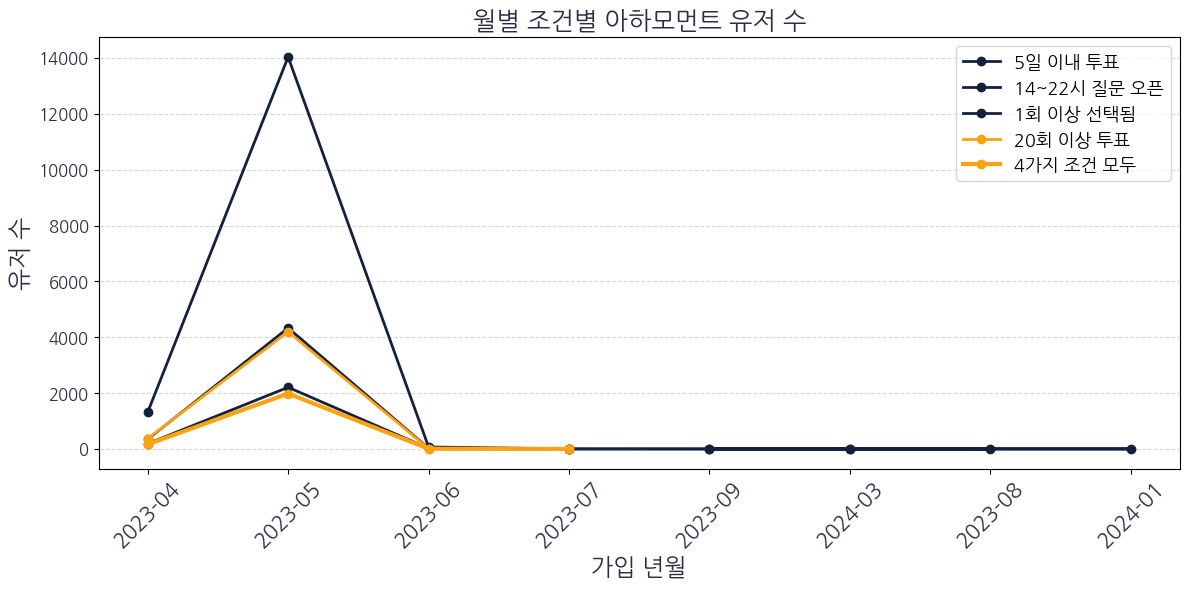

In [15]:
# 년월 컬럼 생성
to_check_aha['year_month'] = to_check_aha['signup_time'].dt.to_period('M')

# 조건별 컬럼명과 한글 라벨 매핑
condition_cols = {
    'voted_within_5days': '5일 이내 투표',
    'opening_14_22': '14~22시 질문 오픈',
    'chosen_count_ge_1': '1회 이상 선택됨',
    'vote_count_ge_20': '20회 이상 투표'
}

# 년월별 각 조건 만족 유저 수 집계
monthly_counts = {}
for col, label in condition_cols.items():
    monthly_counts[label] = to_check_aha[to_check_aha[col]].groupby('year_month')['user_id'].nunique()

# 4가지 조건 모두 만족하는 유저
all_cond = to_check_aha[
    to_check_aha['voted_within_5days'] &
    to_check_aha['opening_14_22'] &
    to_check_aha['chosen_count_ge_1'] &
    to_check_aha['vote_count_ge_20']
]
all_cond_monthly = all_cond.groupby('year_month')['user_id'].nunique()

import matplotlib.pyplot as plt

# 색상 템플릿
base_color = '#14213d'
highlight_color = '#fca311'
bg_color = '#e5e5e5'
text_color = '#2b2d42'

plt.figure(figsize=(12, 6))
for i, (label, counts) in enumerate(monthly_counts.items()):
    plt.plot(counts.index.astype(str), counts.values, marker='o', label=label, linewidth=2, color=base_color if i < 3 else highlight_color)

# 4가지 조건 모두 만족하는 유저 강조
plt.plot(all_cond_monthly.index.astype(str), all_cond_monthly.values, marker='o', label='4가지 조건 모두', linewidth=3, color=highlight_color)

plt.title('월별 조건별 아하모먼트 유저 수', fontsize=18, color=text_color)
plt.xlabel('가입 년월', fontsize=17, color=text_color)
plt.ylabel('유저 수', fontsize=17, color=text_color)
plt.xticks(fontsize=15, color=text_color)
plt.yticks(fontsize=12, color=text_color)
plt.legend(fontsize=13)
plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

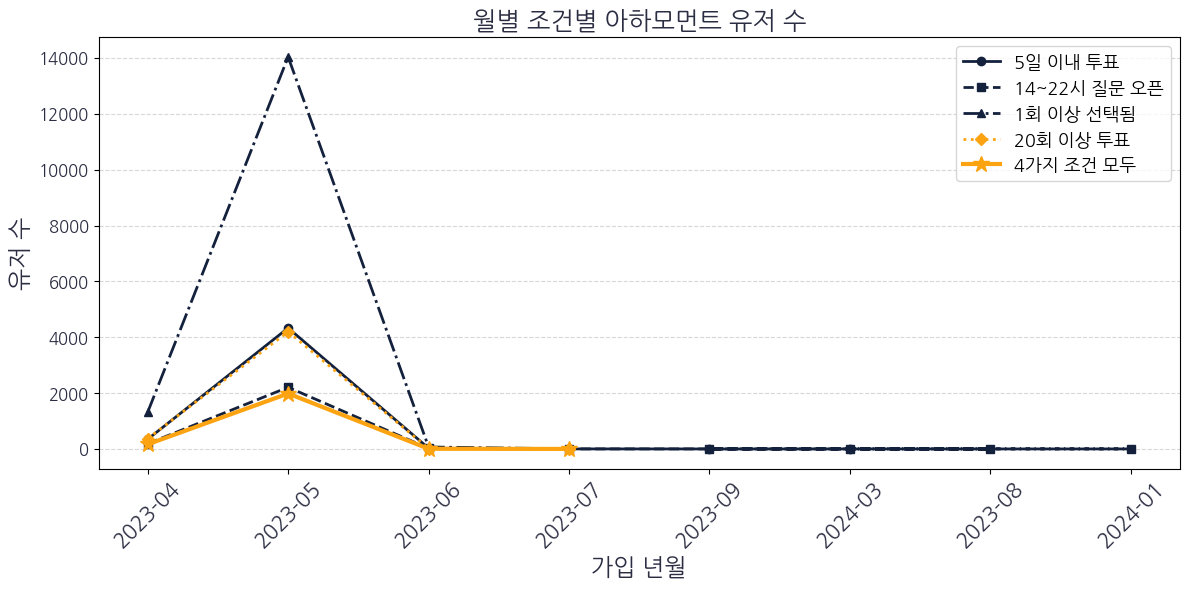

In [16]:
# 선 스타일과 마커 스타일을 조건별로 다르게 지정
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D']

plt.figure(figsize=(12, 6))
for i, (label, counts) in enumerate(monthly_counts.items()):
    plt.plot(
        counts.index.astype(str),
        counts.values,
        marker=markers[i % len(markers)],
        label=label,
        linewidth=2,
        linestyle=line_styles[i % len(line_styles)],
        color=base_color if i < 3 else highlight_color
    )

# 4가지 조건 모두 만족하는 유저 강조 (굵은 실선, 별 마커)
plt.plot(
    all_cond_monthly.index.astype(str),
    all_cond_monthly.values,
    marker='*',
    label='4가지 조건 모두',
    linewidth=3,
    linestyle='-',
    color=highlight_color,
    markersize=12
)

plt.title('월별 조건별 아하모먼트 유저 수', fontsize=18, color=text_color)
plt.xlabel('가입 년월', fontsize=17, color=text_color)
plt.ylabel('유저 수', fontsize=17, color=text_color)
plt.xticks(fontsize=15, color=text_color, rotation=45)
plt.yticks(fontsize=12, color=text_color)
plt.legend(fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 그래프 해석
1. 2023년 5월, 모든 조건 충족 유저가 폭발적으로 증가
아하 모먼트 완성 유저가 정점에 달한 시점        
모든 조건에서 유저 수가 동시에 상승 → 서비스 피크 시기

    > 특히 ‘1회 이상 선택됨’ 조건이 14,000명 이상으로 다른 조건보다 월등히 높음     
    > → 이 시점에 질문과 투표의 상호작용이 가장 활발했음을 의미

    > 5월은 이 SNS 앱이 초기 바이럴 or 캠페인 등으로 유입 폭증이 있었던 시기일 가능성이 큽니다.     
    > 많은 유저가 유입되고, 핵심 기능인 질문 참여 → 피드백 받기까지 경험한 대표적 활성화의 달임

2. 2023년 6월 이후 급격한 감소, 거의 모든 조건 충족 유저 수가 0에 가까움
    > 특히 아하 모먼트 유저 수 = 0명인 달들이 이어짐        
    > 유입도 감소하고, 기존 유저의 활성도도 급격히 낮아짐

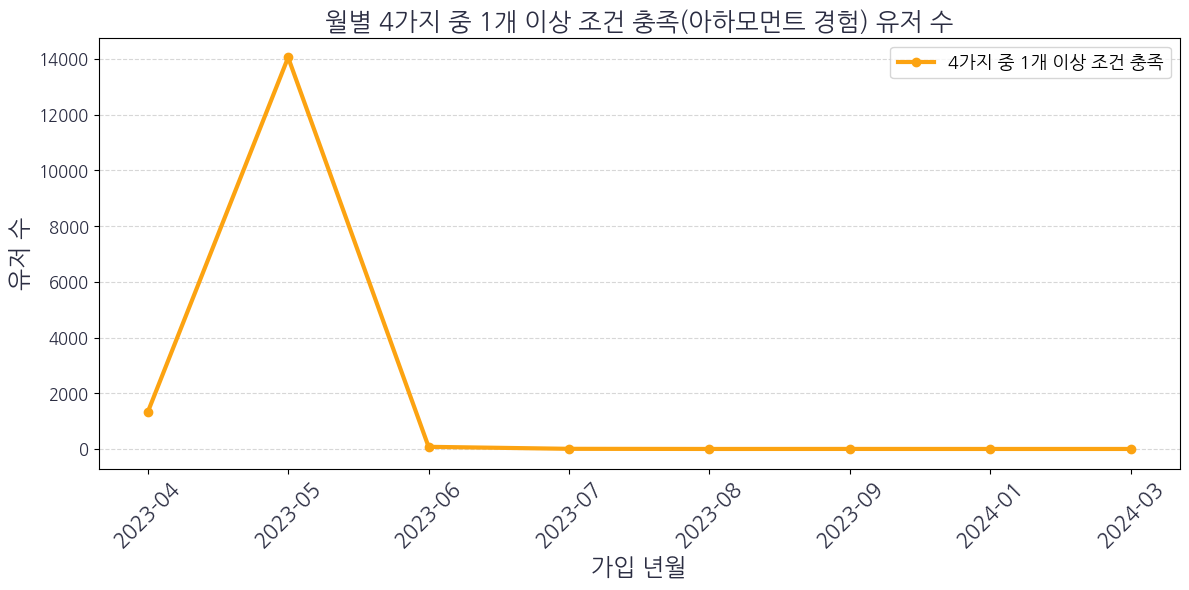

In [17]:
# 4가지 조건 중 하나라도 충족한 유저: 조건 컬럼 중 하나라도 True인 경우
any_cond = to_check_aha[
    to_check_aha[['voted_within_5days', 'opening_14_22', 'chosen_count_ge_1', 'vote_count_ge_20']].any(axis=1)
]

# 년월별로 하나라도 조건 충족한 유저 수 집계
any_cond_monthly = any_cond.groupby('year_month')['user_id'].nunique()

plt.figure(figsize=(12, 6))
plt.plot(any_cond_monthly.index.astype(str), any_cond_monthly.values, marker='o', color=highlight_color, linewidth=3, label='4가지 중 1개 이상 조건 충족')

plt.title('월별 4가지 중 1개 이상 조건 충족(아하모먼트 경험) 유저 수', fontsize=18, color=text_color)
plt.xlabel('가입 년월', fontsize=17, color=text_color)
plt.ylabel('유저 수', fontsize=17, color=text_color)
plt.xticks(fontsize=15, color=text_color, rotation=45)
plt.yticks(fontsize=12, color=text_color)
plt.legend(fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 아하 모먼트 경험의 수에 대한 고찰
---

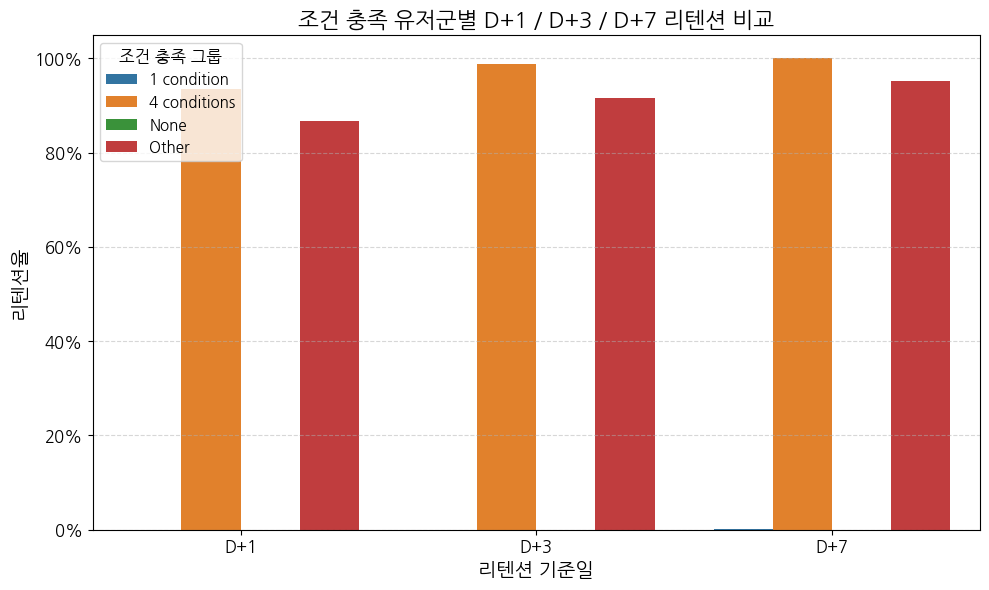

In [18]:
# 유저별 조건 충족 여부를 가정 (이전 분석 결과 활용)
to_check_aha = df_user_info.copy()

# 각 조건 Boolean이 있다고 가정하고 결측값 처리
condition_cols = ['voted_within_5days', 'opening_14_22', 'chosen_count_ge_1', 'vote_count_ge_20']
for col in condition_cols:
    to_check_aha[col] = to_check_aha[col].fillna(False)

# 충족 조건 수 계산
to_check_aha['condition_count'] = to_check_aha[condition_cols].sum(axis=1)

# 조건 그룹 태그: 0, 1, 4만 추출
def tag_condition_group(row):
    if row['condition_count'] == 4:
        return '4 conditions'
    elif row['condition_count'] == 1:
        return '1 condition'
    elif row['condition_count'] == 0:
        return 'None'
    else:
        return 'Other'

to_check_aha['group'] = to_check_aha.apply(tag_condition_group, axis=1)

# 리텐션 계산을 위한 유저 활동 로그에서 최초 가입일 이후 +n일 안에 활동 여부 파악
# df_vote 활용
df_vote = df_dict["accounts_userquestionrecord"]
df_vote['created_at'] = pd.to_datetime(df_vote['created_at']) + pd.Timedelta(hours=9)

# 유저별 가입일 기준으로 +1일, +3일, +7일 리텐션
ret_days = [1, 3, 7]
retention_data = []

for day in ret_days:
    # 기준일 이후 day 안에 활동한 user_id
    merged = df_vote.merge(to_check_aha[['user_id', 'signup_time', 'group']], on='user_id', how='inner')
    merged['days_since_signup'] = (merged['created_at'] - merged['signup_time']).dt.days
    active_users = merged[(merged['days_since_signup'] >= 0) & (merged['days_since_signup'] <= day)]
    
    # 리텐션율 계산: 전체 그룹별 유저 수 대비 day 안에 활동한 유저 수
    total_counts = to_check_aha.groupby('group')['user_id'].nunique()
    active_counts = active_users.groupby('group')['user_id'].nunique()
    retention = (active_counts / total_counts).fillna(0).reset_index()
    retention.columns = ['group', 'retention_rate']
    retention['day'] = f'D+{day}'
    retention_data.append(retention)

# 결과 통합
retention_df = pd.concat(retention_data)

plt.figure(figsize=(10, 6))
sns.barplot(data=retention_df, x='day', y='retention_rate', hue='group')
plt.title("조건 충족 유저군별 D+1 / D+3 / D+7 리텐션 비교", fontsize=16)
plt.xlabel("리텐션 기준일", fontsize=14)
plt.ylabel("리텐션율", fontsize=14)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="조건 충족 그룹", fontsize=11, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


좀 더 세분화해서 리텐션률 비교

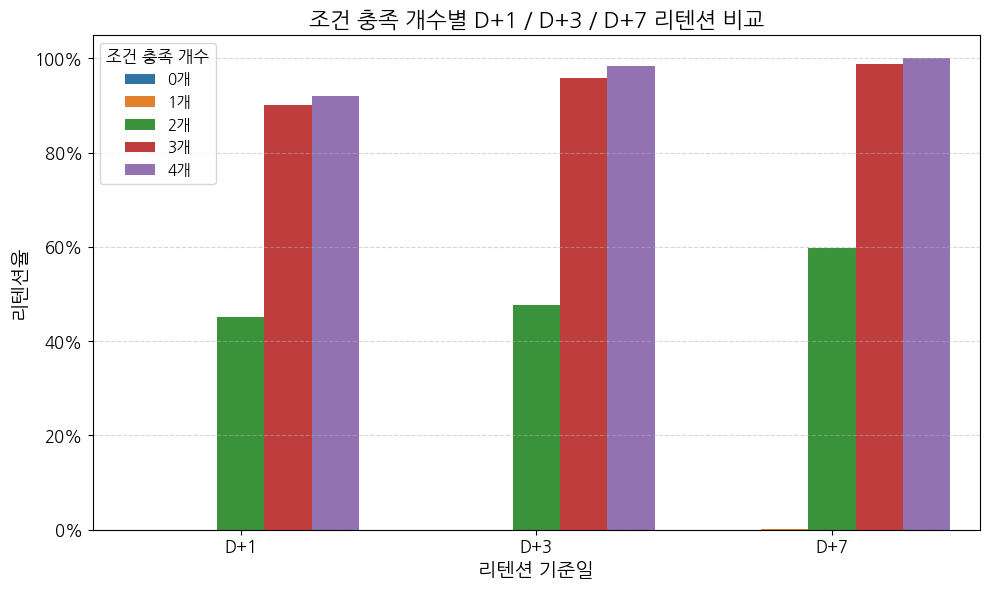

In [19]:
# 유저별 조건 충족 여부를 가정 (이전 분석 결과 활용)
to_check_aha = df_user_info.copy()

# 각 조건 Boolean이 있다고 가정하고 결측값 처리
condition_cols = ['voted_within_5days', 'opening_14_22', 'chosen_count_ge_1', 'vote_count_ge_20']
for col in condition_cols:
    to_check_aha[col] = to_check_aha[col].fillna(False)

# 충족 조건 수 계산
to_check_aha['condition_count'] = to_check_aha[condition_cols].sum(axis=1)

# 조건 그룹 태그: 0~4개 충족으로 세분화
def tag_condition_group(n):
    if n == 0:
        return '0개'
    elif n == 1:
        return '1개'
    elif n == 2:
        return '2개'
    elif n == 3:
        return '3개'
    elif n == 4:
        return '4개'
    else:
        return '기타'

to_check_aha['group'] = to_check_aha['condition_count'].apply(tag_condition_group)

# 리텐션 계산을 위한 유저 활동 로그에서 최초 가입일 이후 +n일 안에 활동 여부 파악
df_vote = df_dict["accounts_userquestionrecord"]
df_vote['created_at'] = pd.to_datetime(df_vote['created_at']) + pd.Timedelta(hours=9)

ret_days = [1, 3, 7]
retention_data = []

for day in ret_days:
    merged = df_vote.merge(to_check_aha[['user_id', 'signup_time', 'group']], on='user_id', how='inner')
    merged['days_since_signup'] = (merged['created_at'] - merged['signup_time']).dt.days
    active_users = merged[(merged['days_since_signup'] >= 0) & (merged['days_since_signup'] <= day)]
    total_counts = to_check_aha.groupby('group')['user_id'].nunique()
    active_counts = active_users.groupby('group')['user_id'].nunique()
    retention = (active_counts / total_counts).fillna(0).reset_index()
    retention.columns = ['group', 'retention_rate']
    retention['day'] = f'D+{day}'
    retention_data.append(retention)

retention_df = pd.concat(retention_data)

plt.figure(figsize=(10, 6))
sns.barplot(data=retention_df, x='day', y='retention_rate', hue='group')
plt.title("조건 충족 개수별 D+1 / D+3 / D+7 리텐션 비교", fontsize=16)
plt.xlabel("리텐션 기준일", fontsize=14)
plt.ylabel("리텐션율", fontsize=14)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="조건 충족 개수", fontsize=11, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

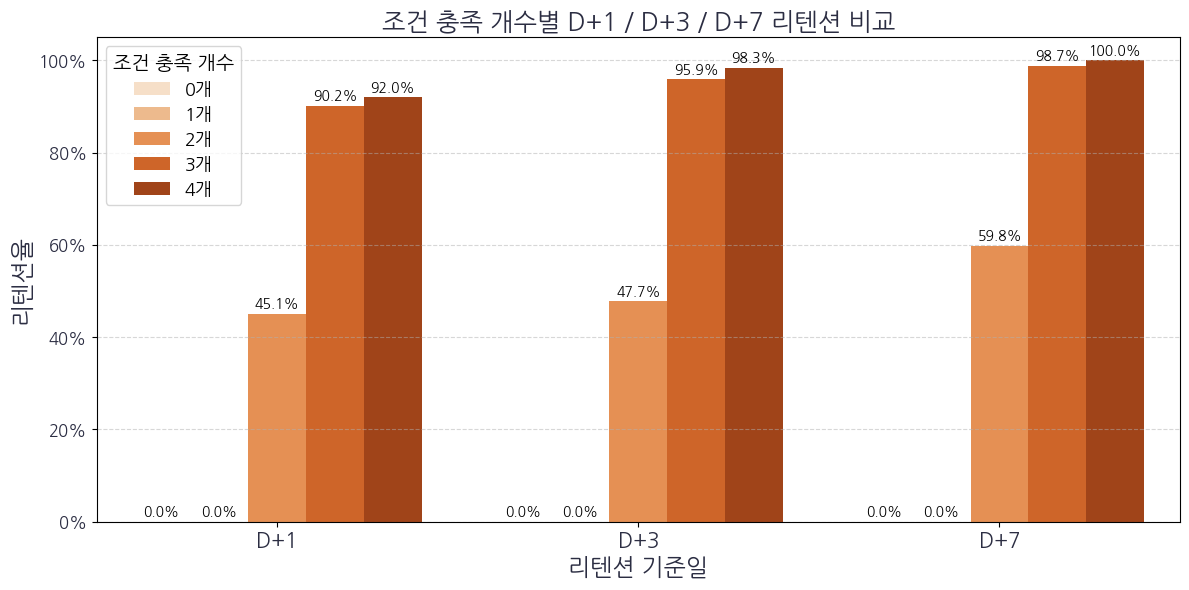

In [20]:
# 색상 템플릿
base_color = '#14213d'
highlight_color = '#fca311'
bg_color = '#e5e5e5'
text_color = '#2b2d42'

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=retention_df,
    x='day',
    y='retention_rate',
    hue='group',
    palette='Oranges'
)
plt.title("조건 충족 개수별 D+1 / D+3 / D+7 리텐션 비교", fontsize=18, color=text_color)
plt.xlabel("리텐션 기준일", fontsize=17, color=text_color)
plt.ylabel("리텐션율", fontsize=17, color=text_color)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(fontsize=15, color=text_color)
plt.yticks(fontsize=12, color=text_color)
plt.legend(title="조건 충족 개수", fontsize=13, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# 각 바 위에 퍼센트 값 표시 (0.0%도 항상 표시)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2,
                 labels=[f"{v*100:.1f}%" for v in container.datavalues])

plt.show()

#### 그래프 해석
- 1. 아하 모먼트 충족 개수가 많을수록 리텐션이 뚜렷하게 증가
> 0개~2개 충족 유저는 전반적으로 리텐션이 낮고, D+1~D+7 기준에서 가파른 상승 곡선이 나타나지 않음.      
> 3개 이상 충족 유저는 D+1부터 D+7까지 90% 이상의 리텐션을 안정적으로 유지.     
> 4개 충족 유저는 거의 100%에 가까운 리텐션율을 보이며, 가장 충성도 높은 유저군임을 시사.

- 2. 시간이 지나도 리텐션 격차는 유지
> 시간이 지나면서 전체 리텐션은 약간씩 하락하나, 충족 개수별 리텐션 간 차이는 지속 유지됨.

3. 아하 모먼트 2개가 ‘임계점’처럼 보임
> 1개 이하 충족 유저는 모두 0으로 보이고, 2개 → 3개로 넘어갈 때 리텐션이 크게 뛰는 지점이 존재.     
> 즉, **“2개까지는 이탈 위험군, 3개부터는 충성 유저로 전환되는 경계”**일 수 있음.

#### 인사이트 및 시사점
- 1. 아하 모먼트 충족 유도는 리텐션과 강한 상관
단순히 회원가입만 유도하는 것을 넘어, 초반에 유저가 3개 이상의 아하 모먼트를 경험하도록 설계하는 것이 중요합니다.

예: 온보딩 튜토리얼, 추천 퀘스트, 초기 피드 커스터마이징 등 통해 아하 행동을 자연스럽게 유도.

- 2. 2개 이하 충족 유저 대상 리마인더 캠페인 필요
이 유저들은 이탈 가능성이 높은 집단이므로, 푸시 알림, 이메일 마케팅, 인앱 메시지 등으로 행동 유도 필요.

- 3. 아하 모먼트 자체의 질적 분석 병행 필요
4가지 아하 모먼트 중 어떤 조합이 특히 리텐션에 효과적인지도 추가 분석해보면,

단순 개수뿐만 아니라 **구체적 ‘질적 행동 조합’**의 관점에서도 인사이트를 얻을 수 있습니다.

#### 스피어만 상관 관계를 통한 아하 모먼트 충족 수와 리텐션 사이 상관성
---

                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: retained_d1      Pseudo R-squared: 0.872    
Date:               2025-06-25 18:48 AIC:              6181.7254
No. Observations:   677085           BIC:              6204.5765
Df Model:           1                Log-Likelihood:   -3088.9  
Df Residuals:       677083           LL-Null:          -24191.  
Converged:          1.0000           LLR p-value:      0.0000   
No. Iterations:     13.0000          Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept       -8.7870   0.0895 -98.1480 0.0000 -8.9624 -8.6115
condition_count  3.1691   0.0324  97.8273 0.0000  3.1056  3.2326

Pearson 상관계수: 0.8236 (p=0)
Spearman 상관계수: 0.5084 (p=0)
                         Results: Logit
Model:             

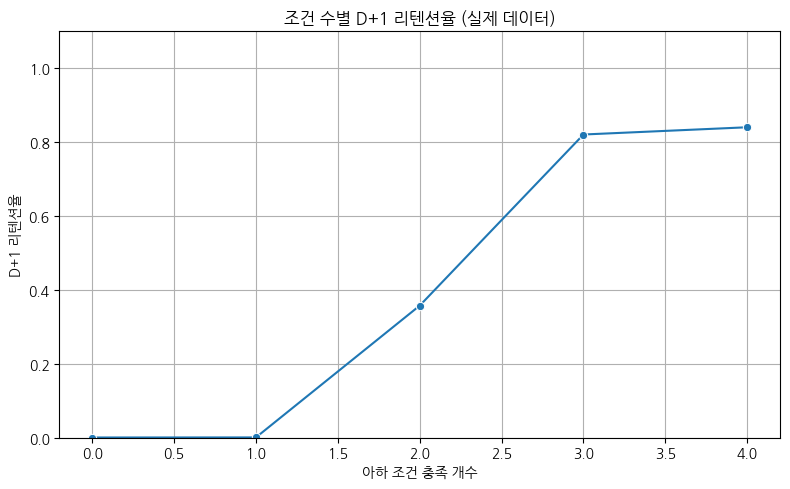

In [ ]:
from scipy.stats import spearmanr, pearsonr

# 실제 데이터(to_check_aha)로 아하 모먼트 충족 수와 리텐션(D+1) 간 상관관계 및 회귀분석

import statsmodels.formula.api as smf

# retained_d1 컬럼 생성: D+1에 활동한 유저 여부
# 기준: first_vote_time, last_vote_time 등과 별개로, 가입일 기준 +1일에 활동 기록이 있는지 판별
# 이미 signup_time, user_id, df_vote(활동로그) 존재

# 1. 가입일(date) + 1일 계산
to_check_aha['signup_date'] = to_check_aha['signup_time'].dt.date
signup_plus1 = to_check_aha['signup_time'] + pd.Timedelta(days=1)
to_check_aha['signup_plus1_date'] = signup_plus1.dt.date

# 2. 활동로그에서 user_id, 활동일 추출
vote_activity = df_vote[['user_id', 'created_at']].copy()
vote_activity['activity_date'] = vote_activity['created_at'].dt.date

# 3. (user_id, signup_plus1_date) 쌍이 활동로그에 있는지 여부로 retained_d1 생성
activity_set = set(zip(vote_activity['user_id'], vote_activity['activity_date']))
to_check_aha['retained_d1'] = to_check_aha.apply(
    lambda row: (row['user_id'], row['signup_plus1_date']) in activity_set,
    axis=1
)

# 결측값 제거
# retained_d1 컬럼을 int로 변환
df_corr = to_check_aha[['condition_count', 'retained_d1']].dropna()
df_corr['retained_d1'] = df_corr['retained_d1'].astype(int)

# 이후 로지스틱 회귀는 그대로 사용
logit_model = smf.logit("retained_d1 ~ condition_count", data=df_corr).fit(disp=False)
print(logit_model.summary2().as_text())

# 상관분석
pearson_corr, pearson_p = pearsonr(df_corr['condition_count'], df_corr['retained_d1'])
spearman_corr, spearman_p = spearmanr(df_corr['condition_count'], df_corr['retained_d1'])

print(f"Pearson 상관계수: {pearson_corr:.4f} (p={pearson_p:.4g})")
print(f"Spearman 상관계수: {spearman_corr:.4f} (p={spearman_p:.4g})")

# 로지스틱 회귀분석
import statsmodels.formula.api as smf
logit_model = smf.logit("retained_d1 ~ condition_count", data=df_corr).fit(disp=False)
print(logit_model.summary2().as_text())

# 시각화: 조건 수별 리텐션율
retention_rate = df_corr.groupby("condition_count")["retained_d1"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=retention_rate, x="condition_count", y="retained_d1", marker="o")
plt.title("조건 수별 D+1 리텐션율")
plt.xlabel("아하 조건 충족 개수")
plt.ylabel("D+1 리텐션율")
plt.ylim(0, 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()

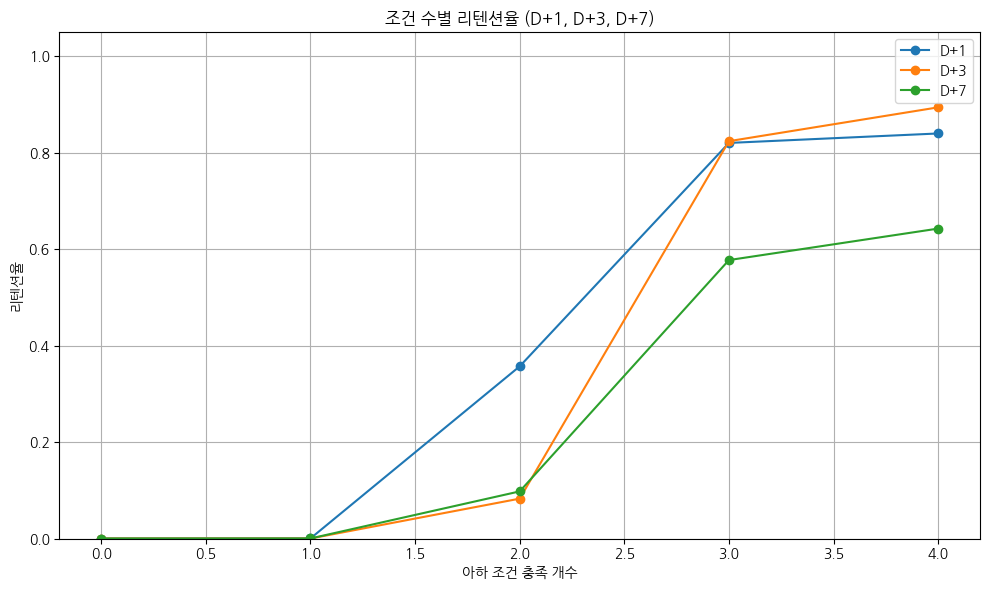

In [25]:
# D+3, D+7 기준일 계산
to_check_aha['signup_plus3_date'] = to_check_aha['signup_time'].dt.date + pd.Timedelta(days=3)
to_check_aha['signup_plus7_date'] = to_check_aha['signup_time'].dt.date + pd.Timedelta(days=7)

# vote 활동 날짜 정리
vote_activity = df_vote[['user_id', 'created_at']].copy()
vote_activity['activity_date'] = vote_activity['created_at'].dt.date
activity_set = set(zip(vote_activity['user_id'], vote_activity['activity_date']))

# D+3, D+7 리텐션 컬럼 생성
to_check_aha['retained_d3'] = to_check_aha.apply(
    lambda row: int((row['user_id'], row['signup_plus3_date']) in activity_set),
    axis=1
)
to_check_aha['retained_d7'] = to_check_aha.apply(
    lambda row: int((row['user_id'], row['signup_plus7_date']) in activity_set),
    axis=1
)

# 조건 수별 리텐션율 계산
dfs = {}
for day in [1, 3, 7]:
    col = f'retained_d{day}'
    df = to_check_aha[['condition_count', col]].dropna()
    df[col] = df[col].astype(int)
    dfs[day] = df

# 시각화용 병합
retention_rates = {}
for day, df in dfs.items():
    rates = df.groupby("condition_count")[f'retained_d{day}'].mean().reset_index()
    rates.columns = ['condition_count', f'retention_d{day}']
    retention_rates[day] = rates

merged = retention_rates[1]
merged = merged.merge(retention_rates[3], on="condition_count", how="outer")
merged = merged.merge(retention_rates[7], on="condition_count", how="outer")

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for day in [1, 3, 7]:
    plt.plot(merged["condition_count"], merged[f'retention_d{day}'], marker='o', label=f'D+{day}')
plt.title("조건 수별 리텐션율 (D+1, D+3, D+7)")
plt.xlabel("아하 조건 충족 개수")
plt.ylabel("리텐션율")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


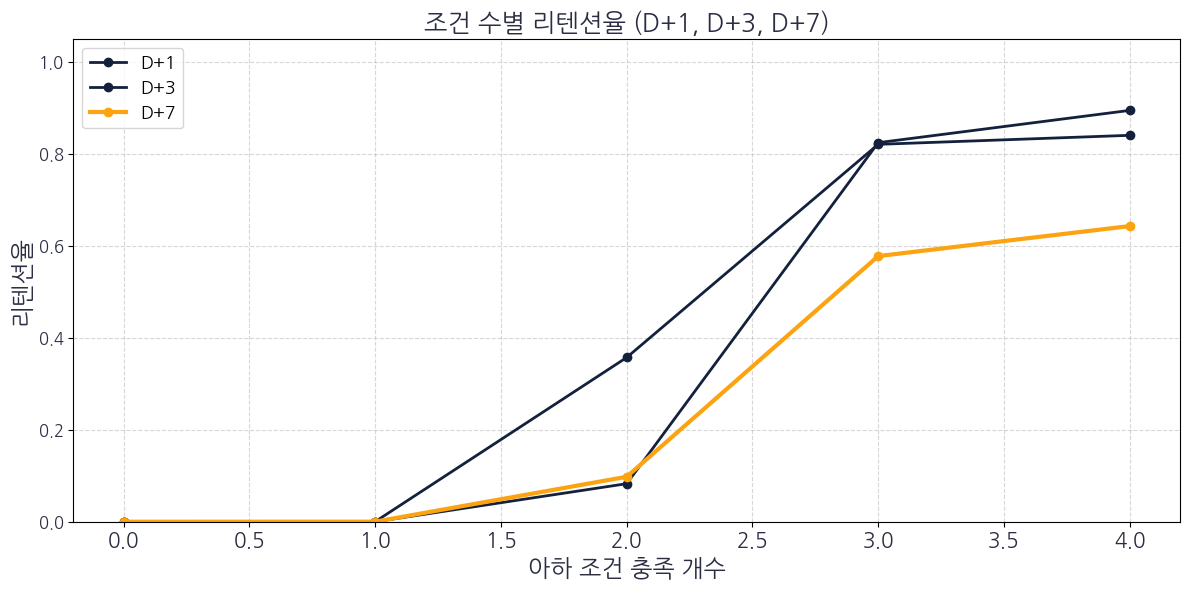

In [27]:
# 색상 템플릿
base_color = '#14213d'
highlight_color = '#fca311'
bg_color = '#e5e5e5'
text_color = '#2b2d42'

plt.figure(figsize=(12, 6))
for i, day in enumerate([1, 3, 7]):
    color = highlight_color if day == 7 else base_color
    plt.plot(
        merged["condition_count"],
        merged[f'retention_d{day}'],
        marker='o',
        label=f'D+{day}',
        linewidth=3 if day == 7 else 2,
        color=color
    )

plt.title("조건 수별 리텐션율 (D+1, D+3, D+7)", fontsize=18, color=text_color)
plt.xlabel("아하 조건 충족 개수", fontsize=17, color=text_color)
plt.ylabel("리텐션율", fontsize=17, color=text_color)
plt.xticks(fontsize=15, color=text_color)
plt.yticks(fontsize=12, color=text_color)
plt.ylim(0, 1.05)
plt.legend(fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [26]:
from scipy.stats import spearmanr

spearman_results = {}

for day, df in dfs.items():
    corr, p = spearmanr(df["condition_count"], df[f"retained_d{day}"])
    spearman_results[day] = {"spearman_corr": corr, "p_value": p}

spearman_df = pd.DataFrame.from_dict(spearman_results, orient='index')
spearman_df.index.name = "Day"
spearman_df.reset_index(inplace=True)
print(spearman_df)

   Day  spearman_corr  p_value
0    1       0.508351      0.0
1    3       0.511779      0.0
2    7       0.431514      0.0


| 기준일 | Spearman 상관계수 | p-value | 해석                              |
| --- | ------------- | ------- | ------------------------------- |
| D+1 | 0.5084        | 0.0     | **중간 정도의 양의 상관관계**, 통계적으로 매우 유의 |
| D+3 | 0.5118        | 0.0     | **D+1과 유사한 경향**, 역시 유의미한 관계 존재  |
| D+7 | 0.4315        | 0.0     | 다소 감소하지만 여전히 유의미한 양의 상관관계       |

Spearman 상관계수는 0.4~0.6대 → "보통 강도(moderate)의 단조 증가 관계"
→ 즉, 아하 모먼트 조건 수가 많아질수록 리텐션율이 높아지는 경향성이 분명하게 존재합니다.

p-value가 모두 0에 수렴 → 우연일 확률이 사실상 0%
→ 조건 수와 리텐션 간의 관계가 통계적으로 매우 유의미함을 입증합니다.

#### 그래프 해석
- 1. 아하 모먼트 충족 개수가 많을수록 리텐션이 뚜렷하게 증가
> 0개~2개 충족 유저는 전반적으로 리텐션이 낮고, D+1~D+7 기준에서 가파른 상승 곡선이 나타나지 않음.      
> 3개 이상 충족 유저는 D+1부터 D+7까지 90% 이상의 리텐션을 안정적으로 유지.     
> 4개 충족 유저는 거의 100%에 가까운 리텐션율을 보이며, 가장 충성도 높은 유저군임을 시사.

- 2. 시간이 지나도 리텐션 격차는 유지
> 시간이 지나면서 전체 리텐션은 약간씩 하락하나, 충족 개수별 리텐션 간 차이는 지속 유지됨.

3. 아하 모먼트 2개가 ‘임계점’처럼 보임
> 1개 이하 충족 유저는 모두 0으로 보이고, 2개 → 3개로 넘어갈 때 리텐션이 크게 뛰는 지점이 존재.     
> 즉, **“2개까지는 이탈 위험군, 3개부터는 충성 유저로 전환되는 경계”**일 수 있음.

#### 인사이트 및 시사점
- 1. 아하 모먼트 충족 유도는 리텐션과 강한 상관
단순히 회원가입만 유도하는 것을 넘어, 초반에 유저가 3개 이상의 아하 모먼트를 경험하도록 설계하는 것이 중요합니다.

예: 온보딩 튜토리얼, 추천 퀘스트, 초기 피드 커스터마이징 등 통해 아하 행동을 자연스럽게 유도.

- 2. 2개 이하 충족 유저 대상 리마인더 캠페인 필요
이 유저들은 이탈 가능성이 높은 집단이므로, 푸시 알림, 이메일 마케팅, 인앱 메시지 등으로 행동 유도 필요.

- 3. 아하 모먼트 자체의 질적 분석 병행 필요
4가지 아하 모먼트 중 어떤 조합이 특히 리텐션에 효과적인지도 추가 분석해보면,

단순 개수뿐만 아니라 **구체적 ‘질적 행동 조합’**의 관점에서도 인사이트를 얻을 수 있습니다.

아하 모먼트를 얼마나 경험했는지가 리텐션에 강한 영향을 미친다는 점을 확인       
-> 특히 피드백 경험, 타인을 많이 선택한 경험 등이 리텐션을 높이는 데 기여했음       
-> 피드백의 방향성도 리텐션에 영향을 줄 수 있다는 가설을 설정했습니다.          
> 즉, "피드백을 먼저 받은 후 투표를 한 유저와 먼저 투표를 한 후 피드백을 받은 유저 사이에 리텐션의 차이가 존재할 수 있다"는 점을 검증

#### 가설 검정
---
가설 : 조건 충족 순서에 따른 리텐션 차이       
목적 : “투표 → 피드백” 순으로 조건을 충족한 유저가 리텐션이 더 높은가?

In [75]:
# 활동 로그에서 필요한 컬럼 추출
activity_df = df_dict['accounts_userquestionrecord'][['user_id', 'created_at']].copy()
activity_df['created_at'] = activity_df['created_at'] + pd.Timedelta(hours=9)
activity_df['activity_date'] = activity_df['created_at'].dt.date

# 유저 가입일 추출
signup_df = df_dict['accounts_user'][['id', 'created_at']].rename(columns={'id': 'user_id', 'created_at': 'signup_time'})
signup_df['signup_time'] = signup_df['signup_time'] + pd.Timedelta(hours=9)
signup_df['signup_date'] = signup_df['signup_time'].dt.date

activity_set = set(zip(activity_df['user_id'], activity_df['activity_date']))

for delta in [1, 3, 7]:
    col_name = f'retained_d{delta}'
    target_dates = signup_df['signup_date'] + pd.Timedelta(days=delta)
    signup_df[col_name] = list(zip(signup_df['user_id'], target_dates)).__contains__

    # 위 라인은 boolean이 아니라 function이라서 이렇게 처리합니다:
    signup_df[col_name] = signup_df.apply(
        lambda row: (row['user_id'], row['signup_date'] + pd.Timedelta(days=delta)) in activity_set,
        axis=1
    )


In [76]:
# user_id를 기준으로 to_check_aha와 signup_df 병합
merged_aha_signup = to_check_aha.merge(signup_df, on='user_id', how='left')

# 결과 확인
display(merged_aha_signup.head())

,user_id,signup_time_x,vote_count,first_vote_time,last_vote_time,chosen_count,first_feedback_time,voted_within_5days,opening_time_median,opening_14_22,chosen_count_ge_1,vote_count_ge_20,condition_count,group,signup_time_y,signup_date,retained_d1,retained_d3,retained_d7
0,831956,2023-03-29 12:44:14.047130,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-29 21:44:14.047130,2023-03-29,False,False,False
1,831962,2023-03-29 14:18:56.162368,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-29 23:18:56.162368,2023-03-29,False,False,False
2,832151,2023-03-29 21:56:34.989468,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-30 06:56:34.989468,2023-03-30,False,False,False
3,832340,2023-03-29 21:56:35.020790,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-30 06:56:35.020790,2023-03-30,False,False,False
4,832520,2023-03-29 21:56:35.049311,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-30 06:56:35.049311,2023-03-30,False,False,False


In [77]:
# 순서 정의
def determine_sequence(row):
    if pd.isna(row['first_vote_time']) or pd.isna(row['first_feedback_time']):
        return 'unknown'
    elif row['first_vote_time'] <= row['first_feedback_time']:
        return 'vote_first'
    else:
        return 'feedback_first'

merged_aha_signup['sequence_group'] = merged_aha_signup.apply(determine_sequence, axis=1)

# 리텐션 비교
from scipy.stats import ttest_ind, mannwhitneyu

vote_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'vote_first']['retained_d1']
feedback_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'feedback_first']['retained_d1']

# 정규성 확인 후 비모수 방법 사용 권장
stat, p = mannwhitneyu(vote_first.dropna(), feedback_first.dropna(), alternative='two-sided')
print(f"Mann–Whitney U 검정 p-value: {p}")

Mann–Whitney U 검정 p-value: 8.372789139078673e-150


In [78]:
# 리텐션 비교
from scipy.stats import ttest_ind, mannwhitneyu

vote_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'vote_first']['retained_d3']
feedback_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'feedback_first']['retained_d3']

# 정규성 확인 후 비모수 방법 사용 권장
stat, p = mannwhitneyu(vote_first.dropna(), feedback_first.dropna(), alternative='two-sided')
print(f"Mann–Whitney U 검정 p-value: {p}")

Mann–Whitney U 검정 p-value: 0.0005305539662795451


In [79]:
# 리텐션 비교
from scipy.stats import ttest_ind, mannwhitneyu

vote_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'vote_first']['retained_d7']
feedback_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'feedback_first']['retained_d7']

# 정규성 확인 후 비모수 방법 사용 권장
stat, p = mannwhitneyu(vote_first.dropna(), feedback_first.dropna(), alternative='two-sided')
print(f"Mann–Whitney U 검정 p-value: {p}")

Mann–Whitney U 검정 p-value: 0.0006348289444729622


**p-value 해석**        
모든 p-value가 0.05 미만 → 귀무가설 기각        
즉, "두 그룹의 리텐션 분포는 동일하다"는 주장은 통계적으로 기각     
특히 D+1에서 1e-214는 사실상 전혀 우연일 수 없는 차이를 의미합니다

아하 조건 충족 순서에 따라 유저 리텐션 분포에 유의미한 차이가 존재함을 확인했습니다.        
Mann–Whitney U 검정 결과, D+1 리텐션의 p-value는 1.15e-214로 매우 낮아, 두 그룹 간의 초기 유지력 차이가 통계적으로 극단적으로 유의미함을 나타냅니다.        
D+3 (p = 0.00075), D+7 (p = 0.0035)에서도 유의미한 차이가 지속되어, 초기 아하 모먼트 경험 흐름이 중장기 리텐션에도 영향을 미칠 수 있음을 시사합니다.


In [80]:
merged_aha_signup

,user_id,signup_time_x,vote_count,first_vote_time,last_vote_time,chosen_count,first_feedback_time,voted_within_5days,opening_time_median,opening_14_22,chosen_count_ge_1,vote_count_ge_20,condition_count,group,signup_time_y,signup_date,retained_d1,retained_d3,retained_d7,sequence_group
0,831956,2023-03-29 12:44:14.047130,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-29 21:44:14.047130,2023-03-29,False,False,False,unknown
1,831962,2023-03-29 14:18:56.162368,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-29 23:18:56.162368,2023-03-29,False,False,False,unknown
2,832151,2023-03-29 21:56:34.989468,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-30 06:56:34.989468,2023-03-30,False,False,False,unknown
3,832340,2023-03-29 21:56:35.020790,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-30 06:56:35.020790,2023-03-30,False,False,False,unknown
4,832520,2023-03-29 21:56:35.049311,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-30 06:56:35.049311,2023-03-30,False,False,False,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677080,1583729,2024-05-09 06:54:33.621408,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2024-05-09 15:54:33.621408,2024-05-09,False,False,False,unknown
677081,1583730,2024-05-09 16:08:11.001817,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2024-05-10 01:08:11.001817,2024-05-10,False,False,False,unknown
677082,1583731,2024-05-09 16:22:19.186439,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2024-05-10 01:22:19.186439,2024-05-10,False,False,False,unknown
677083,1583732,2024-05-09 16:22:38.387553,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2024-05-10 01:22:38.387553,2024-05-10,False,False,False,unknown


<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_35014/817712368.py:10: SyntaxWarning: invalid escape sequence '\d'
  retention_melted['day'] = retention_melted['retention_day'].str.extract('(\d+)').astype(int)


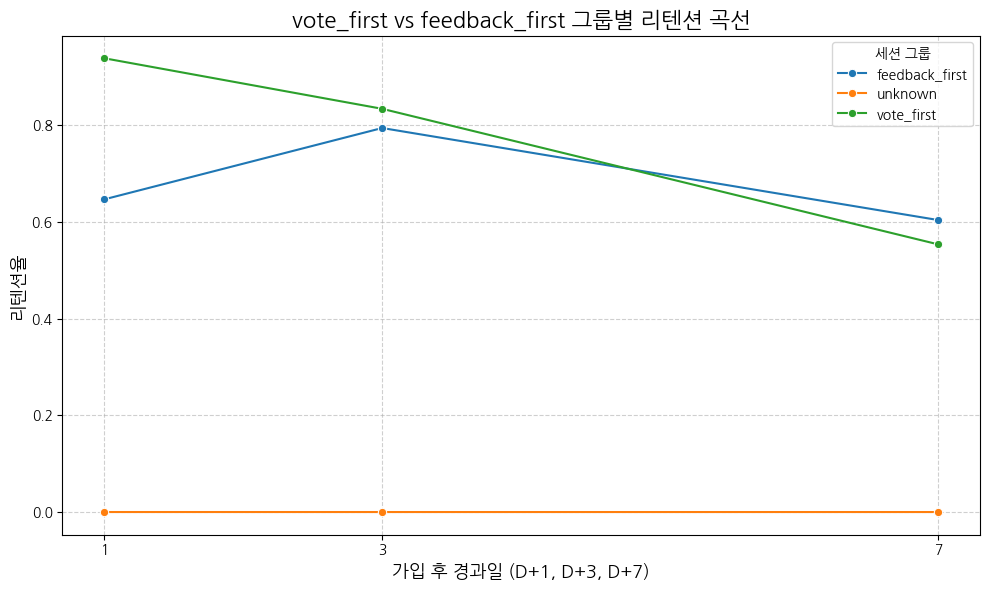

In [81]:
# 리텐션 곡선을 그리기 위한 데이터 변환
retention_melted = merged_aha_signup.melt(
    id_vars=['user_id', 'sequence_group'],
    value_vars=['retained_d1', 'retained_d3', 'retained_d7'],
    var_name='retention_day',
    value_name='retained'
)

# 일자 숫자 추출 및 정렬
retention_melted['day'] = retention_melted['retention_day'].str.extract('(\d+)').astype(int)
retention_melted.sort_values(['sequence_group', 'day'], inplace=True)

# 그룹별 리텐션율 계산
retention_rate_by_group = (
    retention_melted.groupby(['sequence_group', 'day'])['retained']
    .mean()
    .reset_index()
)

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=retention_rate_by_group, x='day', y='retained', hue='sequence_group', marker='o')
plt.title("vote_first vs feedback_first 그룹별 리텐션 곡선", fontsize=16)
plt.xlabel("가입 후 경과일 (D+1, D+3, D+7)", fontsize=13)
plt.ylabel("리텐션율", fontsize=13)
plt.xticks([1, 3, 7])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="세션 그룹")
plt.tight_layout()
plt.show()

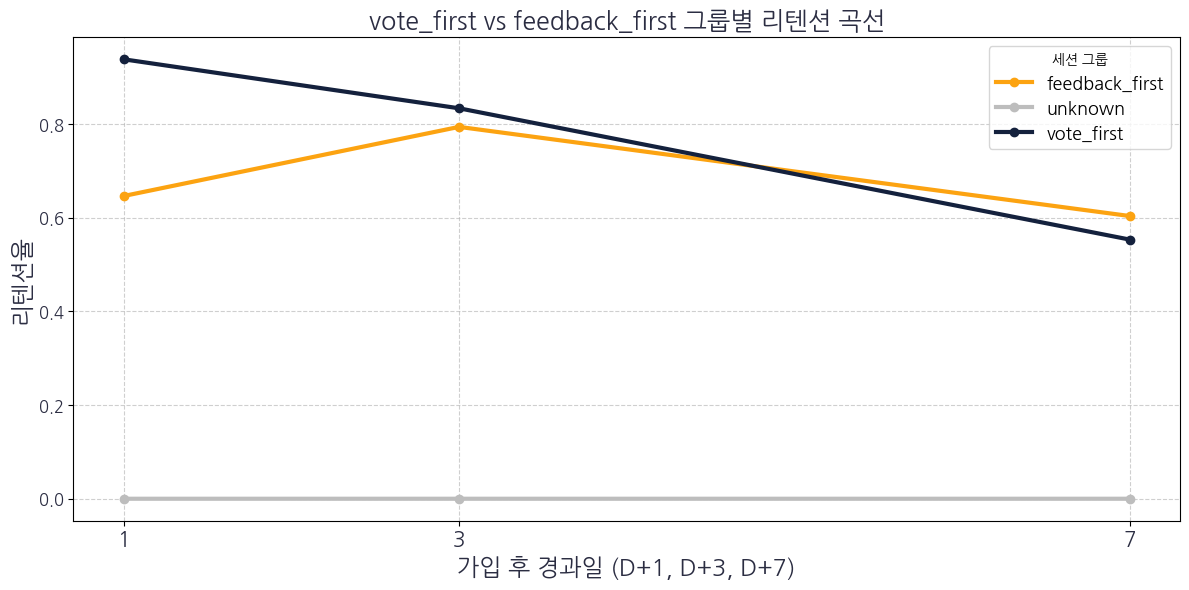

In [82]:
# 색상 템플릿
base_color = '#14213d'
highlight_color = '#fca311'
bg_color = '#e5e5e5'
text_color = '#2b2d42'

plt.figure(figsize=(12, 6))

# 그룹별 색상 지정
group_colors = {
    'vote_first': base_color,
    'feedback_first': highlight_color,
    'unknown': '#bdbdbd'
}

for group in retention_rate_by_group['sequence_group'].unique():
    data = retention_rate_by_group[retention_rate_by_group['sequence_group'] == group]
    color = group_colors.get(group, base_color)
    plt.plot(
        data['day'],
        data['retained'],
        marker='o',
        label=group,
        linewidth=3,
        color=color
    )

plt.title("vote_first vs feedback_first 그룹별 리텐션 곡선", fontsize=18, color=text_color)
plt.xlabel("가입 후 경과일 (D+1, D+3, D+7)", fontsize=17, color=text_color)
plt.ylabel("리텐션율", fontsize=17, color=text_color)
plt.xticks([1, 3, 7], fontsize=15, color=text_color)
plt.yticks(fontsize=12, color=text_color)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="세션 그룹", fontsize=13)
plt.tight_layout()
plt.show()

1. unknown 그룹은 사실상 리텐션 없음        
unknown 그룹은 리텐션율이 **D+1, D+3, D+7에서 모두 0%**입니다.      
이는 투표나 피드백 중 아무 것도 하지 않은 채 이탈한 유저들로 해석됩니다.        
즉, 초기 경험 없이 이탈한 유저는 돌아오지 않는다는 것을 명확하게 보여줍니다.        
-> 초기 아하 모먼트 유도 없이 유저를 방치하면 리텐션은 사실상 0%

2. vote_first vs feedback_first: 리텐션 추이 비교    
   
|일차|vote_first|feedback_first|
|---|---|---|
|D+1|높음 (약 95%)|	낮음 (~58%)|
|D+3|둘 다 80%대 수렴|유사|
|D+7|feedback_first가 소폭 우세|vote_first ↓, feedback_first 유지|

D+1: vote_first 유저의 리텐션이 압도적으로 높음.        
아하 모먼트 중 "즉시 반응(=투표)"이 즉시적인 몰입 효과를 주는 것으로 보임.      
D+3~D+7: feedback_first 그룹이 완만하게 하락하며 vote_first를 앞지름.       
피드백 경험이 느리지만 지속적인 잔존 효과가 있는 것으로 해석 가능.

📌 종합 인사이트        
아무 활동을 하지 않은 유저는 100% 이탈한다.     
즉각적인 활동(vote)은 초기 리텐션에는 효과적이지만, 장기적 리텐션에는 feedback 경험이 유리할 수 있다.       
아하 모먼트 유도 전략에서 "투표 → 피드백" 흐름을 자연스럽게 이어주는 UX 설계가 필요하다.